# Zomoto Price Prediction Analysis:

Zomoto is one of the online food ordering applications, dominating marketplaces in India’s most populous country. Zomato provides restaurant information, menus, and user ratings, as well as food delivery choices from partner restaurants. According to sources, Zomoto is active in over 1,000 Indian cities and towns as of 2022–23. By utilizing the dataset of Banglore, one of the fastest developing cities and one of the most ordered cities online. The dataset of Banglore city hotels listed on Zomoto includes dining information that determines the factor of Average Pricing for 2 people.

# About the Dataset:

The dataset is 550 MB in size with a shape of 51717 different Restaurants at different locations and 17 features of them. The 17 different columns indicate:

URL: The link to the Restaurant
Address: The restaurant where it is situated
Name: The Name of the Restaurant
Online Orders: Whether Online orders are available or not
Book Table: Can we book a table at the restaurant
Rate: The customer Rating of the restaurant
Votes: The number of customers rated the restaurant
Phone: The phone number of the restaurant
Location: The Area in which the restaurant is located
Restaurant Type: The type of restaurant in terms of style
Dishes Liked: The most liked dishes of the restaurant
Cuisines: The cuisines that they serve
Approximate Cost: The cost for 2 people to spend to eat
Review List: The reviews of the restaurant
Menu Items: The dishes that they serve
Listed in type: The Category of restaurant(Delivery/ Dine-Out/Buffet etc…)
Listed in city: The name of the area at which they are located in the city

# Necessary Libraries for Data Analysis:

The Python libraries that we are using for data analysis:

Pandas
NumPy
matplotlib
Seaborn
Scikit-learn

# Importing the listed library:

In [1]:
# %% Import all the necessary:

import numpy as np
import pandas as pd
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

# Loading the datasets:

I have attached the csv files in my GitHub link, given below. To load the datasets, we use the pandas library:

In [2]:
# %% Getting the datasets:

data = pd.read_csv("/kaggle/input/zomato/zomato.csv")

# Getting the basic info of the dataset:

We will use the pandas to get the basic details of both the train and test datasets such as their data types, null value if any, and their statistical values of continuous columns.

In [3]:
# %% Getting the basic details of train:

print(data.info())
stats = data.describe()
print(data.shape)
print(data.isna().sum())
print(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# Data Cleaning:

# Miscellaneous Columns:

In this dataset, there are a lot of unwanted columns which is not necessary for our data analysis and price prediction. So we removed some of the irrelevant columns to our analysis project.

In [4]:
# %% Removing Unnecessary Columns: [By Logical]

data.drop(['url', 'reviews_list', 'menu_item', 'phone', 'dish_liked'], axis=1, inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51717 non-null  object
 1   name                         51717 non-null  object
 2   online_order                 51717 non-null  object
 3   book_table                   51717 non-null  object
 4   rate                         43942 non-null  object
 5   votes                        51717 non-null  int64 
 6   location                     51696 non-null  object
 7   rest_type                    51490 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  listed_in(type)              51717 non-null  object
 11  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.7+ MB
None


# Miscellaneous Data Values:

In the columns of the dataset, some of the values contain miscellaneous values causing inconsistencies in the dataset. Such data should be dealt with carelessly by making them uniform. For instance, in the Rating column, some of the new restaurants having fewer votes are categorized as NEW in the rating column. All the restaurants have it in numerical form, hence we convert all these NEW values into Nan values.

In [5]:
# Making NEW values in rate column as Nan values:

print('The NEW values: ')
print(data.isin(['NEW']).sum())
data.replace('NEW', np.nan, inplace=True)
print('The NEW values: ')
print(data.isin(['NEW']).sum())

The NEW values: 
address                           0
name                              0
online_order                      0
book_table                        0
rate                           2208
votes                             0
location                          0
rest_type                         0
cuisines                          0
approx_cost(for two people)       0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64
The NEW values: 
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64


By this, we convert all the NEW rated values in the rate column into Nan values.

In the same rate column, the restaurant data have a “-” value which is again converted into Nan values to make it more skewed. For the other restaurants with zero votes with the rate of Nan values, we treated them as outliers and removed them from the dataset. All the rate values in the dataset are in the form of fractions such as a/b. Thus the rate values are converted into numerical form by applying a function that divides and replaces the rating fractions.

In [6]:
def rater(val, delimiter: str = "/"):
    if type(val) != type(np.nan):
        n, d = list(map(np.float64, val.split(delimiter)))
        return n / d

In [7]:
# Making rate column as numerical from it is miscellaneous form:

data['rate'].astype(object)
data['rate'].replace('nan', np.nan, inplace=True)
data['rate'].replace('-', np.nan, inplace=True)
outlier = data[data['rate'].isna()]
outlier = outlier[outlier['votes'] != 0]
outlier = outlier.iloc[:, 3:5]
data.drop(outlier.index, inplace=True)
data.reset_index(drop=True)
data['rate'] = data['rate'].apply(rater)
data['rate'].replace(np.nan, 0, inplace=True)

/tmp/ipykernel_18/3202238028.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rate'].replace('nan', np.nan, inplace=True)
/tmp/ipykernel_18/3202238028.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

The last instance in this dataset is the Approximate cost of dining in which the numbers with thousands have “,” in between them. For example, instead of 1000, the dataset has 1,000 resulting in a string. So we operate to remove that comma from the cost.

In [8]:
# Making approx cost to numerical form:

data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(str)
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(',', '')
data['approx_cost(for two people)'].astype(object)
data['approx_cost(for two people)'].replace('nan', np.nan, inplace=True)

/tmp/ipykernel_18/1929337911.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['approx_cost(for two people)'].replace('nan', np.nan, inplace=True)


# Nan Values:

After dealing with all the Miscellaneous data, let’s deal with the Nan values of the dataset. We checked the Nan values, the columns of Location, rest_type, cuisines, and Approximate Cost. As all the Nan value counts are less than 5% of the total data present, we would replace all the Nan values in all 4 columns by the SimpleImputer method.

In [9]:
# %% Importing the SimpleImputer:

from sklearn.impute import SimpleImputer

# Approx_Cost for 2 people — Median Technique:

The approx_cost column in the dataset, the type of column is a continuous type of data. This column has around 343 Nan values, which should be replaced by the Median value of the whole column to make use of the missing data to increase the accuracy of the prediction.

In [10]:
# %% Performing operations for the remaining null values:

impute_data = data.isna().sum()
impute_data = impute_data[impute_data != 0]
print(impute_data)

# In this, we have 2 columns of categorical and 1 continuously:

impute_data = impute_data
Impute = SimpleImputer(strategy='median')
data['approx_cost(for two people)'] = Impute.fit_transform(data['approx_cost(for two people)'].to_numpy().reshape((-1, 1)))

location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    343
dtype: int64


# Cuisines and rest_type — Mode Technique:

The columns cuisines and rest_type are categorical data columns containing Nan values of count 45 and 227. Thus, data Nan values are dealt with by the mode values of that particular column. To do it in a specific manner, we are using grouping to fill the Nan values of the columns with columns with which they have a positive correlation. For example, In filling the rest_type column Nan values, we utilize approx_cost column values for the grouping process, which would be used to replace with more accurate values. For filling the cuisine’s Nan values, by using rest_type, we will replace and deal with the Nan values.

In [11]:
# %% Replacing the Nan values of cuisines and rest_type:

mode = lambda x: x.mode().iloc[0] if not x.mode().empty else None
data['rest_type'].fillna(data.groupby('approx_cost(for two people)')['rest_type'].transform(mode), inplace=True)
data['cuisines'].fillna(data.groupby('rest_type')['cuisines'].transform(mode), inplace=True)
print(data.isna().sum())

address                         0
name                            0
online_order                    0
book_table                      0
rate                            0
votes                           0
location                       21
rest_type                       0
cuisines                        0
approx_cost(for two people)     0
listed_in(type)                 0
listed_in(city)                 0
dtype: int64


/tmp/ipykernel_18/2821695780.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rest_type'].fillna(data.groupby('approx_cost(for two people)')['rest_type'].transform(mode), inplace=True)
/tmp/ipykernel_18/2821695780.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

# Outliers Removal:
The dataset is still with some outliers which may cause us deviations during the process of predictions and results in the occurance of lower accuracy levels. The dataset still has some outliers that may cause deviations during the process of predictions, leading us to the occurrence of lower accuracy levels. To detect the outliers, we use:

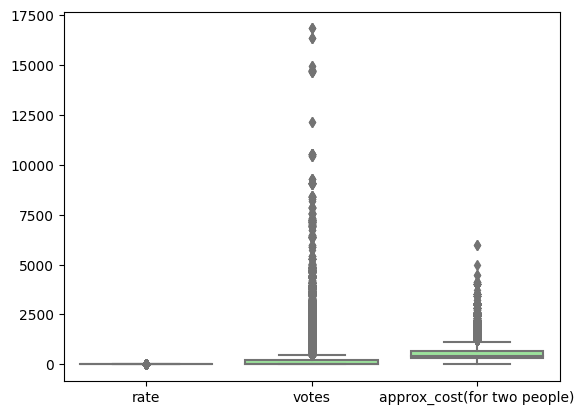

In [12]:
# %% The library used for removing outliers:

from matplotlib.cbook import boxplot_stats

# %% Anomaly Detection and Outliers:

sn.boxplot(data=data, color="lightgreen")
plt.show()

# %% Removing the detected outliers:

outliers = (boxplot_stats(data[data.columns[[4, 5, 9]]]))
outliers = pd.DataFrame(outliers)['fliers']
data = data[~data['rate'].isin(outliers[0])]
data.dropna(subset='location', inplace=True)

# Creating More Important Columns:

In the dataset, we have a column of rest_type and cuisines having to be a list value that cannot be used for inputting into the Machine Learning Model. Thus we use the simple function by which we replace it into numerical value by the types of availability replacing it.

In [13]:
# %% Getting the number of available cuisines and restaurant type:

data['cuisines'] = data['cuisines'].str.split(',')
data['rest_type'] = data['rest_type'].str.split(',')
data['cuisines'] = data['cuisines'].apply(lambda x: len(x)-1)
data['rest_type'] = data['rest_type'].apply(lambda y: len(y)-1)

# Splitting the Independent Variable and Dependent Variable:

In machine concept, we predict the Dependent Variable from the independent variables by various machine learning algorithms such as Logistic Regression. Before that, we need to split these from the datasets column-wise by the loc function. In this, we have Independent variables which are referred to as Predictors are all other columns except the Passenger Id and the Dependent variable also referred to as the Target Variable the Survival column. We assign the predictors columns to X_train and the targeted column to y_train from the data dataset. We assign the X_test with the test dataset which will be tested with the model. In this dataset project, by all the listed columns we are going to predict the cost for dining for 2 people.

In [14]:
# %% Splitting Data between Independent and Dependent:

X = data[['online_order', 'book_table', 'votes', 'rate', 'listed_in(type)', 'listed_in(city)', 'location', 'cuisines', 'rest_type']]
Y = data['approx_cost(for two people)'].values

# Data Transformation:

After splitting the data, still we need to transform the data to be more suitable for the algorithm to give the best accuracy in lesser amounts of time. Thus we are going to process the data by:

# Scaling the data:

The values of the Votes and Rates columns have a high range compared to other column values. Thus, the outlier values will cause inaccuracy in the prediction by the machine learning model. To counter this, we use a data preprocessing technique of MinMax Scaling to scale down the values of that column to have a lower range difference between every column between the values of 0 to 1. We apply it by importing it:

In [15]:
# %% Standardization of continuous data:

sc = MinMaxScaler()
X.iloc[:, 2:4] = sc.fit_transform(X.iloc[:, 2:4])
Y = sc.fit_transform(Y.reshape((-1, 1)))

/tmp/ipykernel_18/2669363860.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.04604325 0.04675618 0.05453897 ... 0.00160409 0.01402091 0.00077234]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, 2:4] = sc.fit_transform(X.iloc[:, 2:4])


# Label Encoder:

By importing the sklearn.preprocessing we can access the LabelEncoder to convert labeled data, the categorical data to a continuous form of data.

This LabelEncoder, we use it to convert the data into a numerical form for the using that column for the prediction of approximate cost. For the Book Table and Online order categorical columns, we fit and transform these into the LabelEncoder() to into numerical.

In [16]:
# %% Converting Categorical Values of Yes or No to Label:

feature = LabelEncoder()
X.loc[:, 'online_order'] = feature.fit_transform(X.loc[:, 'online_order'])
X.loc[:, 'book_table'] = feature.fit_transform(X.loc[:, 'book_table'])

# One Hot Encoding:

The categorical values such as listed_in(type), listed_in(city), and locations all these three columns have a lot of different numbers of columns. In the process of label encoding when there are more than 2 categories of data, we use the concept of onehotendoing.

The One hot encoding works differently. For example, The types of restaurants such as Buffet, Cafe, and Family are the different types in a categorical data column. When one hot encoding is used, it gets converted into:

1 0 0 — Buffet

0 1 0 — Cafe

0 0 1 — Family

In [17]:
# %% Converting Categorical Values into Numerical ones:

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [4, 5, 6])], remainder="passthrough")
X_trans = (ct.fit_transform(X).toarray())

# Fitting into the machine learning model:

In any model, we first fit the data into the model by the fit(), and then we predict the value by the predict(). In fit(), we input the X_train and y_train for the data to the model. In the predict(), we input the X_test to test the Machine Learning. Then we compare the train and test datasets, to get the accuracy score.

In [18]:
# %% Splitting the data into train and test data:

X_train, X_test, Y_train, Y_test = train_test_split(X_trans, Y, test_size=0.2)

# Linear Regression:

In [19]:
# %% Using Linear Regression:

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)
lr = r2_score(Y_test, Y_predict)

# Extra Trees Regressor:

In [20]:
# %% Extra Trees Regressor:

ET_Model = ExtraTreesRegressor(n_estimators=120, verbose=2, n_jobs=-1)
ET_Model.fit(X_train, Y_train)
Y_predict = ET_Model.predict(X_test)
et = r2_score(Y_test, Y_predict)

/tmp/ipykernel_18/3133822617.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ET_Model.fit(X_train, Y_train)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 120
building tree 2 of 120
building tree 3 of 120
building tree 4 of 120
building tree 5 of 120
building tree 6 of 120
building tree 7 of 120
building tree 8 of 120
building tree 9 of 120
building tree 10 of 120
building tree 11 of 120
building tree 12 of 120
building tree 13 of 120
building tree 14 of 120
building tree 15 of 120
building tree 16 of 120
building tree 17 of 120
building tree 18 of 120
building tree 19 of 120
building tree 20 of 120
building tree 21 of 120
building tree 22 of 120
building tree 23 of 120
building tree 24 of 120
building tree 25 of 120
building tree 26 of 120
building tree 27 of 120
building tree 28 of 120
building tree 29 of 120
building tree 30 of 120
building tree 31 of 120
building tree 32 of 120
building tree 33 of 120
building tree 34 of 120
building tree 35 of 120
building tree 36 of 120
building tree 37 of 120
building tree 38 of 120
building tree 39 of 120
building tree 40 of 120


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.4s


building tree 41 of 120
building tree 42 of 120
building tree 43 of 120
building tree 44 of 120
building tree 45 of 120
building tree 46 of 120
building tree 47 of 120
building tree 48 of 120
building tree 49 of 120
building tree 50 of 120
building tree 51 of 120
building tree 52 of 120
building tree 53 of 120
building tree 54 of 120
building tree 55 of 120
building tree 56 of 120
building tree 57 of 120
building tree 58 of 120
building tree 59 of 120
building tree 60 of 120
building tree 61 of 120
building tree 62 of 120
building tree 63 of 120
building tree 64 of 120
building tree 65 of 120
building tree 66 of 120
building tree 67 of 120
building tree 68 of 120
building tree 69 of 120
building tree 70 of 120
building tree 71 of 120
building tree 72 of 120
building tree 73 of 120
building tree 74 of 120
building tree 75 of 120
building tree 76 of 120
building tree 77 of 120
building tree 78 of 120
building tree 79 of 120
building tree 80 of 120
building tree 81 of 120
building tree 82

[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   45.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    0.2s finished


# Random Forest Regressor:

In [21]:
# %% Random Forest Regressor:

RF_Model = RandomForestRegressor(n_estimators=650, random_state=245, min_samples_leaf=.0001, verbose=2, n_jobs=-1)
RF_Model.fit(X_train, Y_train.ravel())
Y_predict = RF_Model.predict(X_test)
rf = r2_score(Y_test, Y_predict)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 650building tree 2 of 650
building tree 3 of 650

building tree 4 of 650
building tree 5 of 650
building tree 6 of 650
building tree 7 of 650
building tree 8 of 650
building tree 9 of 650
building tree 10 of 650
building tree 11 of 650
building tree 12 of 650
building tree 13 of 650
building tree 14 of 650
building tree 15 of 650
building tree 16 of 650
building tree 17 of 650
building tree 18 of 650
building tree 19 of 650
building tree 20 of 650
building tree 21 of 650
building tree 22 of 650
building tree 23 of 650
building tree 24 of 650
building tree 25 of 650
building tree 26 of 650
building tree 27 of 650
building tree 28 of 650
building tree 29 of 650
building tree 30 of 650
building tree 31 of 650
building tree 32 of 650
building tree 33 of 650
building tree 34 of 650
building tree 35 of 650
building tree 36 of 650
building tree 37 of 650
building tree 38 of 650
building tree 39 of 650
building tree 40 of 650


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.4s


building tree 41 of 650
building tree 42 of 650
building tree 43 of 650
building tree 44 of 650
building tree 45 of 650
building tree 46 of 650
building tree 47 of 650
building tree 48 of 650
building tree 49 of 650
building tree 50 of 650
building tree 51 of 650
building tree 52 of 650
building tree 53 of 650
building tree 54 of 650
building tree 55 of 650
building tree 56 of 650
building tree 57 of 650
building tree 58 of 650
building tree 59 of 650
building tree 60 of 650
building tree 61 of 650
building tree 62 of 650
building tree 63 of 650
building tree 64 of 650
building tree 65 of 650
building tree 66 of 650
building tree 67 of 650
building tree 68 of 650
building tree 69 of 650
building tree 70 of 650
building tree 71 of 650
building tree 72 of 650
building tree 73 of 650
building tree 74 of 650
building tree 75 of 650
building tree 76 of 650
building tree 77 of 650
building tree 78 of 650
building tree 79 of 650
building tree 80 of 650
building tree 81 of 650building tree 82 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.8s


building tree 160 of 650
building tree 161 of 650
building tree 162 of 650
building tree 163 of 650
building tree 164 of 650
building tree 165 of 650
building tree 166 of 650
building tree 167 of 650
building tree 168 of 650
building tree 169 of 650
building tree 170 of 650
building tree 171 of 650
building tree 172 of 650
building tree 173 of 650
building tree 174 of 650
building tree 175 of 650
building tree 176 of 650
building tree 177 of 650
building tree 178 of 650
building tree 179 of 650
building tree 180 of 650
building tree 181 of 650
building tree 182 of 650
building tree 183 of 650
building tree 184 of 650
building tree 185 of 650
building tree 186 of 650
building tree 187 of 650
building tree 188 of 650
building tree 189 of 650
building tree 190 of 650
building tree 191 of 650
building tree 192 of 650
building tree 193 of 650
building tree 194 of 650
building tree 195 of 650
building tree 196 of 650
building tree 197 of 650
building tree 198 of 650
building tree 199 of 650


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   57.8s


building tree 364 of 650
building tree 365 of 650
building tree 366 of 650
building tree 367 of 650
building tree 368 of 650
building tree 369 of 650
building tree 370 of 650
building tree 371 of 650
building tree 372 of 650
building tree 373 of 650
building tree 374 of 650
building tree 375 of 650
building tree 376 of 650
building tree 377 of 650
building tree 378 of 650
building tree 379 of 650
building tree 380 of 650
building tree 381 of 650
building tree 382 of 650
building tree 383 of 650
building tree 384 of 650
building tree 385 of 650
building tree 386 of 650
building tree 387 of 650
building tree 388 of 650
building tree 389 of 650
building tree 390 of 650
building tree 391 of 650
building tree 392 of 650
building tree 393 of 650
building tree 394 of 650
building tree 395 of 650
building tree 396 of 650
building tree 397 of 650
building tree 398 of 650
building tree 399 of 650
building tree 400 of 650
building tree 401 of 650
building tree 402 of 650
building tree 403 of 650


[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.7min


building tree 645 of 650
building tree 646 of 650
building tree 647 of 650
building tree 648 of 650
building tree 649 of 650
building tree 650 of 650


[Parallel(n_jobs=-1)]: Done 650 out of 650 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 650 out of 650 | elapsed:    0.5s finished


# XGB Regressor:

In [22]:
# %% XGB Regressor:

xgb_r = xg.XGBRegressor(n_estimators=2000, verbosity=3, n_jobs=-1)
xgb_r.fit(X_train, Y_train)
Y_predict = xgb_r.predict(X_test)
xbr = r2_score(Y_test, Y_predict)

[07:10:17] ======== Monitor (0): HostSketchContainer ========
[07:10:17] AllReduce: 0.001884s, 1 calls @ 1884us

[07:10:17] MakeCuts: 0.00204s, 1 calls @ 2040us

[07:10:17] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 0
[07:10:34] ======== Monitor (0): Learner ========
[07:10:34] Configure: 0.002752s, 1 calls @ 2752us

[07:10:34] EvalOneIter: 0.02956s, 2000 calls @ 29560us

[07:10:34] GetGradient: 0.083074s, 2000 calls @ 83074us

[07:10:34] PredictRaw: 0.004177s, 2000 calls @ 4177us

[07:10:34] UpdateOneIter: 16.7316s, 2000 calls @ 16731563us

[07:10:34] ======== Monitor (0): GBTree ========
[07:10:34] BoostNewTrees: 16.6214s, 2000 calls @ 16621373us

[07:10:34] CommitModel: 0.002042s, 2000 calls @ 2042us

[07:10:34] ======== Monitor (0): HistUpdater ========
[07:10:34] BuildHistogram: 4.71146s, 7620 calls @ 4711463us

[07:10:34] EvaluateSplits: 0.797146s, 9620 calls @ 797146us

[07:10:34] InitData: 0.115342s, 2000 calls @ 115342us

[07:10:34] InitRoot: 9.70019s, 2000 ca

# Final Results:
By getting the prediction results, the highest accuracy is obtained by using :

In [23]:
# %% Printing the Accuracy of Models:

print("The R2 score of Linear Regression: ", lr)
print("The R2 score of Random Forest: ", rf)
print("The R2 score of Extra Tree: ", et)
print("The R2 score of XGB Regression: ", xbr)

The R2 score of Linear Regression:  0.5336887624738835
The R2 score of Random Forest:  0.8544529122622648
The R2 score of Extra Tree:  0.9065818662886349
The R2 score of XGB Regression:  0.9194634020720406


Thus the final highest accuracy in predicting the Approximate cost for 2 people to dine in is 0.92.